Проект доступен на GitHub по ссылке: https://github.com/IvCorsar/Tutored_training_practicum/

# "В один клик" - персонализация предложений для пользователей

## Введение

**Цель работы**  
Разработать решение, которое позволит персонализировать предложения постоянным клиентам.

**Ожидаемый эффект от реализации проекта**  
Увеличение покупательской активности постоянных клиентов.

**Задачи, направленные на достижение цели**
1. Промаркировать уровень финансовой активности постоянных покупателей ("снизилась", "прежний уровень").

2. Сгруппировать данные по клиентам по следующим группам: 
- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
3. Дополнить информацию дополнительными данными финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
4. Построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
5. На основе собранных данных и данных модели выделить сегменты покупателей и разработать для них персонализированные предложения.

**План работы**  
1. Загрузить данные, оценить количество пропусков, наличие дубликатов.
2. Провести исследовательский анализ данных на наличие аномальных, выпадающих значений.
3. Провести корреляционный анализ данных.
4. Составить, обучить и оценить различные модели для предсказания целевых признаков.
5. Сегментировать покупателей на основе полученных данных.


**Описание предоставленных данных**

Для работы были предоставлены следующие файлы.

1. market_file.csv. Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. Данные, которые есть в таблице: 
- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

2. market_money.csv. Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом. Данные, которые есть в таблице: 
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

3. market_time.csv. Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода. Данные, которые есть в таблице:
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

4. money.csv. Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю. Данные, которые есть в таблице: 
- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.



## Загрузка данных и библиотек

### Библиотеки и функции

В работе использованы следующие библиотеки и функции:

In [1]:
!pip install shap 

In [2]:
! pip install phik

In [3]:
# Импорты стандартных библиотек
import pandas as pd
import numpy as np

# Импорты для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report


# Импорты для подготовки и обучения моделей
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import (OneHotEncoder, 
                                   OrdinalEncoder, 
                                   StandardScaler, 
                                   MinMaxScaler, 
                                   RobustScaler)
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, recall_score, precision_score

# Импорты для анализа признаков
import shap

# Импорты для обработки предупреждений
import warnings
warnings.filterwarnings("ignore")

In [4]:
def duplicated_string(df):  
    """
    Функция выводит уникальные значения всех столбцов с типом object.

    Параметры:
        df: датафрейм, в котором есть столбцы с типом данных object.

    Возвращает:
        Уникальные значения каждого столбца.

    """
    for column in df.columns.values.tolist():
        if df[column].dtype == object:
            print(f'В столбце {column} уникальные значения: {df[column].unique()}.')

In [5]:
def lunge_analysis(df, columns, groups):
    """
    Функция строит боксплоты и гистограммы по переданному списку столбцов и с группировкой по одному категориальному признаку.

    Параметры:
        df: датафрейм с нужными значениями.
        columns: список названий столбцов, по которым надо построить диаграммы.
        groups: столбец из датафрейма с категориальными значениями.

    Возвращает:
        Оформленные боксплоты и гистограммы.

    """
    for column in columns:
        f, ax = plt.subplots(1, 2, figsize=(15, 5))
        ax_1 = sns.histplot(data=df, x=column, hue=df[groups], ax=ax[0])
        ax_1.set (xlabel=column, ylabel='Количество', title=f'Гистограмма по столбцу {column}')
        ax_2 = sns.boxplot(data=df, y=column, ax=ax[1], width=.2)
        ax_2.set (xlabel=column, ylabel='Значение', title=f'Диаграмма размаха признака {column}')
        plt.show()

In [6]:
def cat_buying_activity(df):
    """
    функция кодирования целевого признака.

    Параметры:
        df: датафрейм с нужными значениями.

    Возвращает:
        1 и 0 в зависимости от значения столбца buying_activity.

    """
    
    if df['buying_activity'] == 'Снизилась':
        return 1
    else:
        return 0

### Загрузка данных для работы

Загрузим данные, полученные от заказчика и ознакомимся с ними.

In [7]:
file_df = pd.read_csv("C:/Users/yakov/Downloads/Tutored_training/market_file.csv")
market_money_df = pd.read_csv('C:/Users/yakov/Downloads/Tutored_training/market_money.csv')
time_df = pd.read_csv('C:/Users/yakov/Downloads/Tutored_training/market_time.csv')
money_df = pd.read_csv('C:/Users/yakov/Downloads/Tutored_training/money.csv', sep=';', decimal=',')

In [8]:
file_df.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [9]:
file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [10]:
market_money_df.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [11]:
market_money_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [12]:
time_df.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [13]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [14]:
money_df.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [15]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


**Итог по разделу:** данные загружены, пропусков нет, названия столбцов совпадают с описанием, полученным от заказчика.

## Предобработка данных

### Форматирования столбцов
Приведем столбцы к нужному виду. Для этого создадим словарь.

In [16]:
eng_columns = {
    'Покупательская активность':'buying_activity',
    'Тип сервиса':'service_type',
    'Разрешить сообщать':'allow_reporting',
    'Маркет_актив_6_мес':'market_active_6_months',
    'Маркет_актив_тек_мес':'market_active_curr_months',
    'Длительность':'duration',
    'Акционные_покупки':'promotional_purchases',
    'Популярная_категория':'popular_category',
    'Средний_просмотр_категорий_за_визит':'av_cat_view_visit',
    'Неоплаченные_продукты_штук_квартал':'unpaid_prod_items_quart',
    'Ошибка_сервиса':'service_error',
    'Страниц_за_визит':'pages_visit',
    'Период':'period',
    'Выручка':'revenue',
    'минут':'minutes',
    'Прибыль':'profit'    
}

Проведем замену названий в датафреймах.

In [17]:
file_df = file_df.rename(columns=eng_columns)
market_money_df = market_money_df.rename(columns=eng_columns)
time_df = time_df.rename(columns=eng_columns)
money_df = money_df.rename(columns=eng_columns)

Проверим как прошла замены.

In [18]:
file_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1300 non-null   int64  
 1   buying_activity            1300 non-null   object 
 2   service_type               1300 non-null   object 
 3   allow_reporting            1300 non-null   object 
 4   market_active_6_months     1300 non-null   float64
 5   market_active_curr_months  1300 non-null   int64  
 6   duration                   1300 non-null   int64  
 7   promotional_purchases      1300 non-null   float64
 8   popular_category           1300 non-null   object 
 9   av_cat_view_visit          1300 non-null   int64  
 10  unpaid_prod_items_quart    1300 non-null   int64  
 11  service_error              1300 non-null   int64  
 12  pages_visit                1300 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage:

In [19]:
market_money_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   period   3900 non-null   object 
 2   revenue  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [20]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       2600 non-null   int64 
 1   period   2600 non-null   object
 2   minutes  2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [21]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1300 non-null   int64  
 1   profit  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Во всех столбцах замена проведена корректно.

### Проверка наличия дубликатов

Сперва проверим полные явные дубликаты.

In [22]:
file_df.duplicated().sum()

0

In [23]:
market_money_df.duplicated().sum()

0

In [24]:
time_df.duplicated().sum()

0

In [25]:
money_df.duplicated().sum()

0

Полных явных дубликатов нет.

Проверим дубликаты в столбцах id.

In [26]:
file_df['id'].duplicated().sum()

0

In [27]:
market_money_df['id'].duplicated().sum()

2600

In [28]:
time_df['id'].duplicated().sum()

1300

In [29]:
money_df['id'].duplicated().sum()

0

В датафреймах market_money_df и time_df есть дубликаты в столбце id, но они имеют значения, поэтому удалять их не стоит. В датафреймах file_df и money_df дубликатов нет.

Теперь проверим неявные дубликаты.

In [30]:
duplicated_string(file_df)

В столбце buying_activity уникальные значения: ['Снизилась' 'Прежний уровень'].
В столбце service_type уникальные значения: ['премиум' 'стандартт' 'стандарт'].
В столбце allow_reporting уникальные значения: ['да' 'нет'].
В столбце popular_category уникальные значения: ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника'].


Замечена очевидная опечатка: есть категория "стандартт" в столбце "service_type". Устраним её.

In [31]:
file_df['service_type'] = file_df['service_type'].replace('стандартт', 'стандарт')

Проверим корректность замены.

In [32]:
file_df['service_type'].unique()

array(['премиум', 'стандарт'], dtype=object)

Замена проведена.

In [33]:
duplicated_string(market_money_df)

В столбце period уникальные значения: ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц'].


Несмотря на необычное название категории "препредыдущий_месяц", удалять его нельзя, так как оно означает предпредыдущий месяц.

In [34]:
duplicated_string(time_df)

В столбце period уникальные значения: ['текущий_месяц' 'предыдцщий_месяц'].


Очевидна опечатка в категории "предыдцщий_месяц". Исправим её.

In [35]:
time_df['period'] = time_df['period'].replace('предыдцщий_месяц', 'предыдущий_месяц')

In [36]:
time_df['period'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Замена проведена.

В датафрейме money_df нет столбцов с типом object.

**Итог по разделу:** 
1. Приведены названия столбцов к общепринятым.
2. Обработаны дубликаты и ошибка в категориях.

## Исследовательский анализ данных

### Анализ данных на выпады и аномальные значения
Проведем исследования данных на наличие выбросов или аномальных значений.

In [37]:
num_file_df_columns = ['market_active_6_months', 
                       'market_active_curr_months', 
                       'duration', 
                       'promotional_purchases', 
                       'av_cat_view_visit',
                       'unpaid_prod_items_quart',
                       'service_error',
                       'pages_visit'
                      ]  # список количественных столбцов для анализа. 

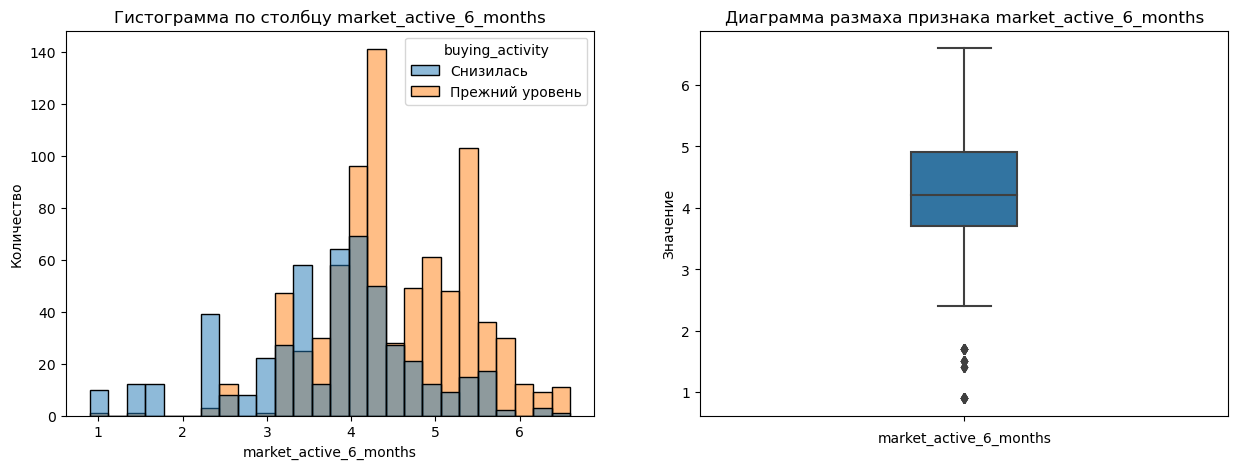

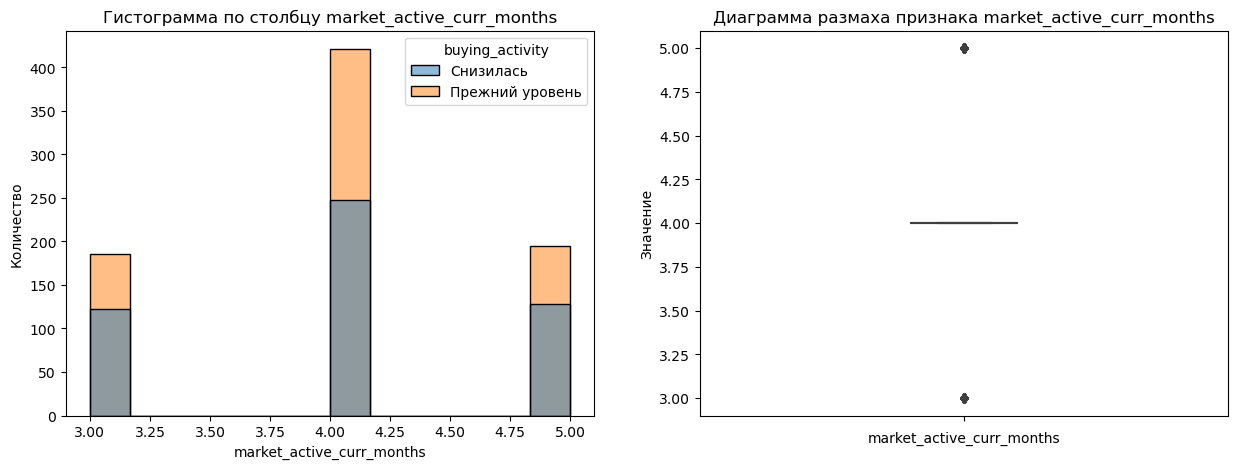

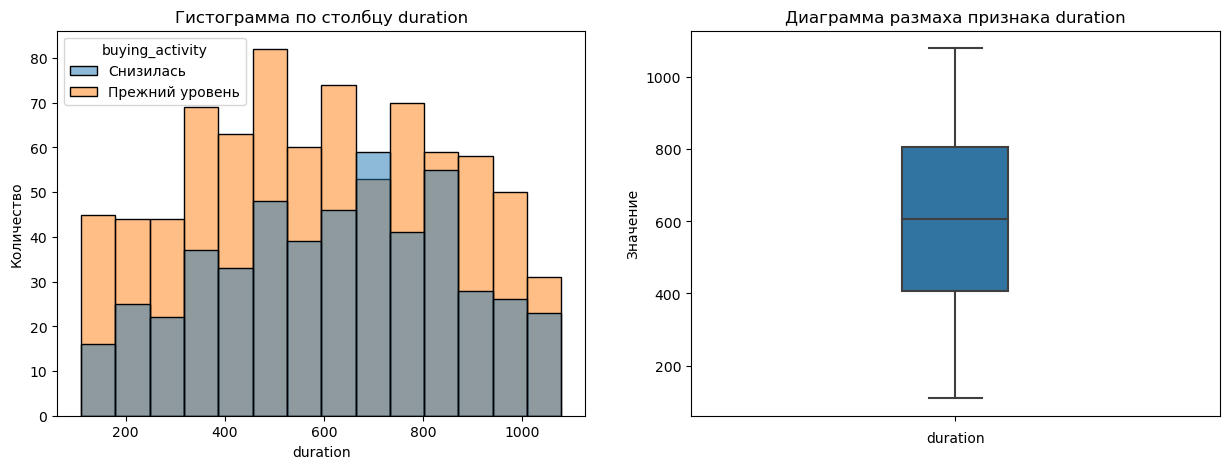

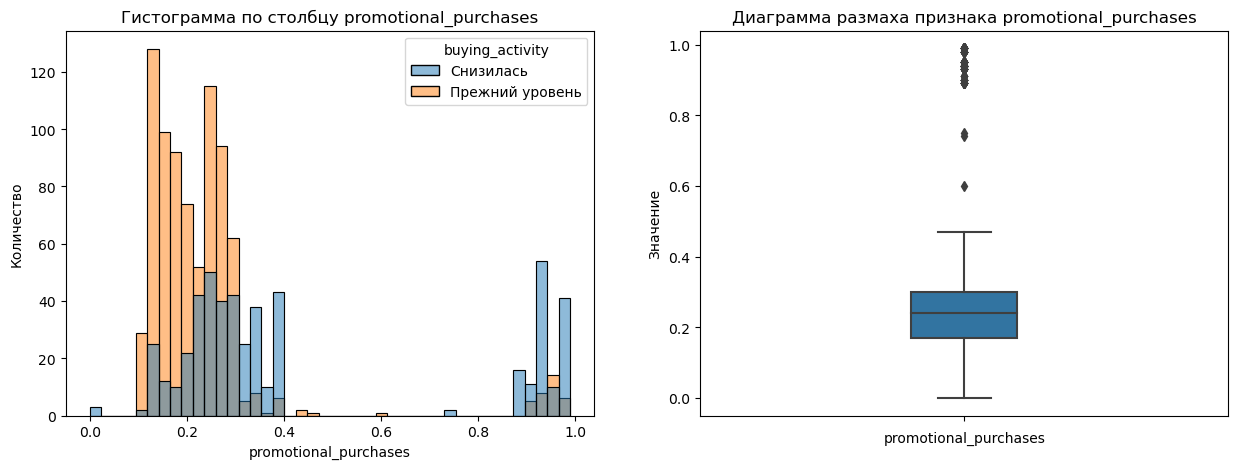

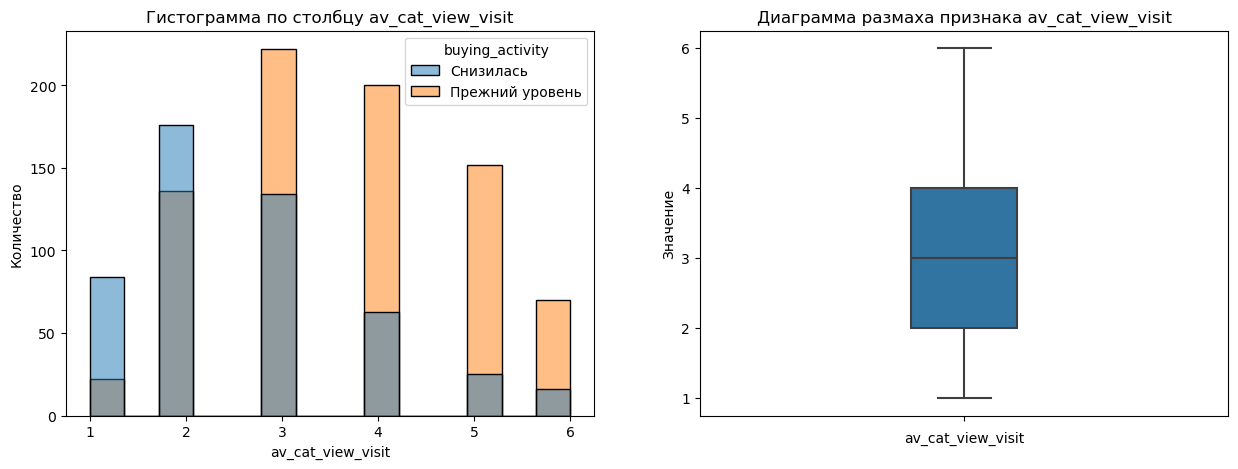

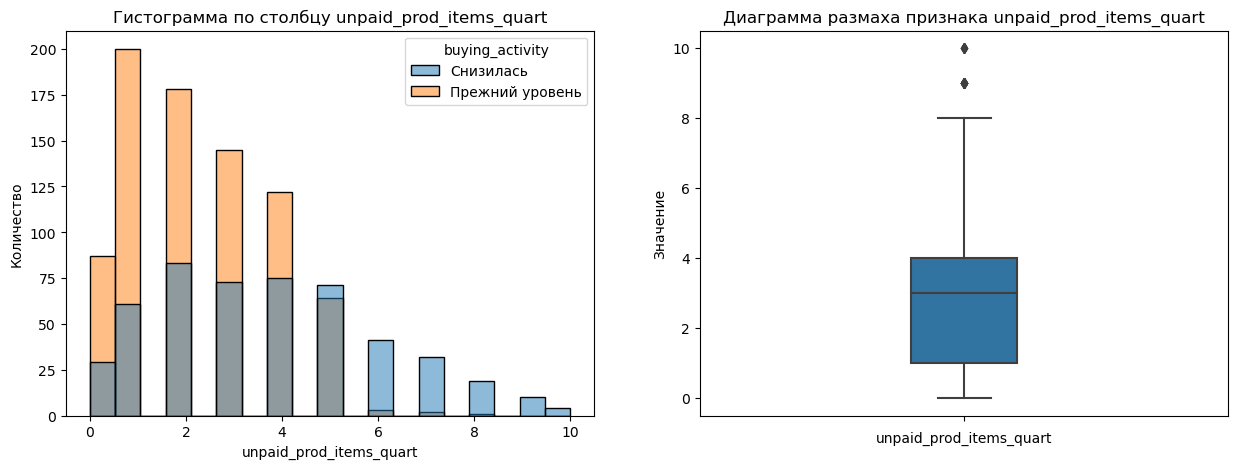

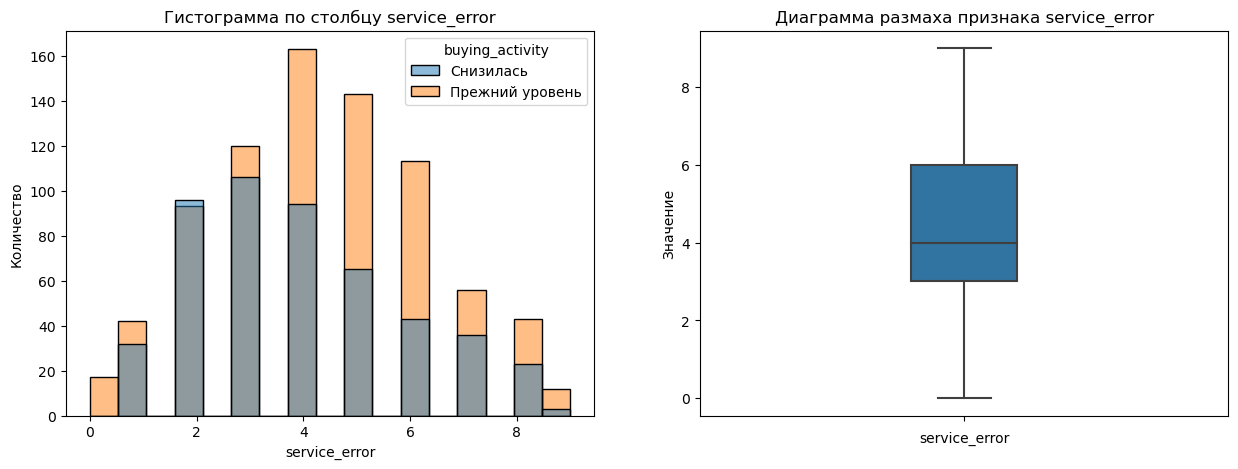

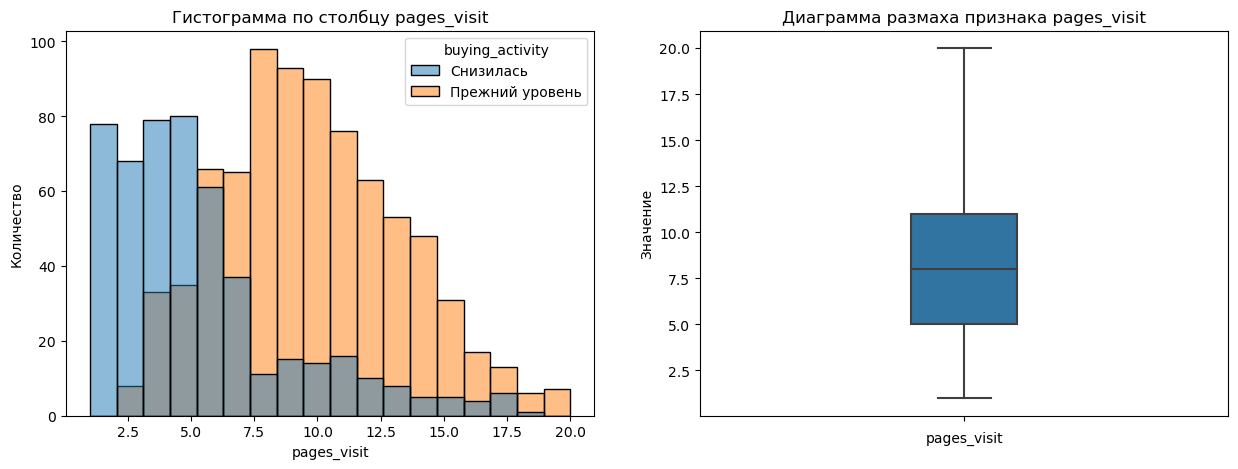

In [38]:
lunge_analysis(file_df, num_file_df_columns, 'buying_activity')

Из гистограмм и боксплотов видно:
1. Есть выбросы. Они встречаются в market_active_6_months, promotional_purchases, unpaid_prod_items_quart.
2. В market_active_curr_months разброс значений очень маленький, соответство боксплот не информативен.
3. В большинстве случаев распределение унимодельное, кроме promotional_purchases. В этом стобце наблюдается бимодальное распределение и два пика: в районе 0,2 и в районе 0,9. Очевидно, есть относительно большая группа покупателей, которая старается покупать только по акции. Наличие пика в районе 0,2 можно объяснить тем, что акции всё-таки работают и большая часть людей ими пользуется.

Теперь посмотрим на данные из таблицы market_money_df.

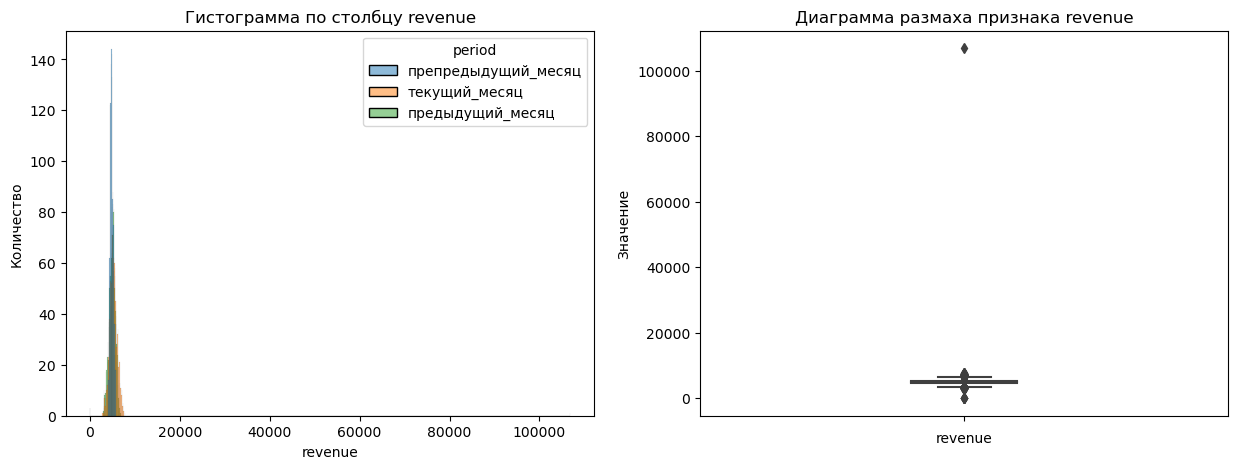

In [39]:
lunge_analysis(market_money_df, ['revenue'], 'period')

Очевидно, есть значения, которые сильно выделяется из общей картины. Посмотрим сколько их.

In [40]:
market_money_df.loc[market_money_df['revenue'] > 9000]['revenue'].count()

1

Всего одно. Возможно, оно не ошибочное, но слишком отличается от средних значений. Лучше его удалить.

In [41]:
market_money_df = market_money_df.loc[market_money_df['revenue'] < 9000]

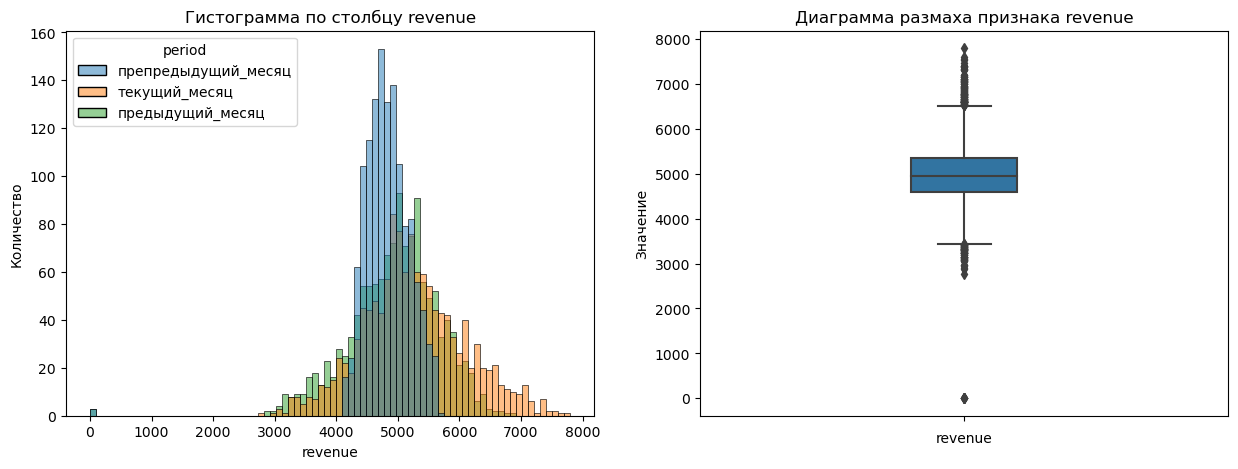

In [42]:
lunge_analysis(market_money_df, ['revenue'], 'period')

Выпады всё ещё есть, но уже не так сильно отличаются.

Теперь посмотрим на таблицу time_df.

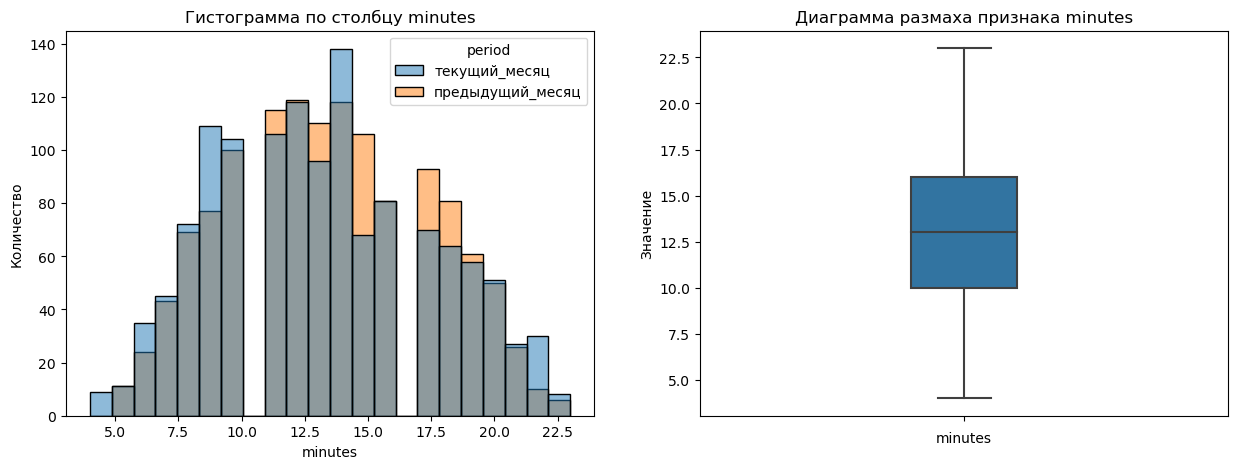

In [43]:
lunge_analysis(time_df, ['minutes'], 'period')

Выпадов нет, распределение унимодальное.

Теперь посмотрим на таблицу money_df.

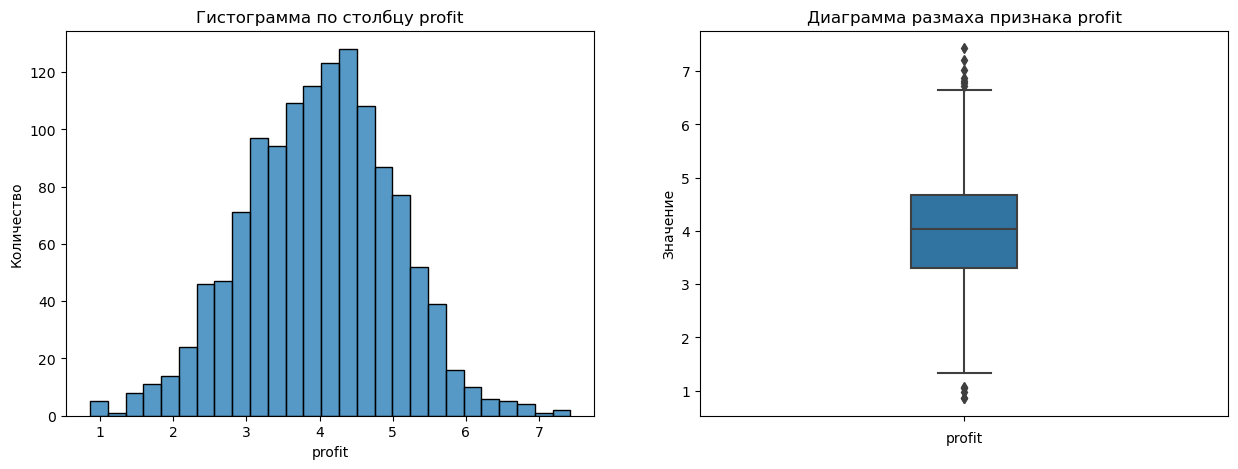

In [44]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
ax_1 = sns.histplot(data=money_df, x='profit', ax=ax[0])
ax_1.set (xlabel='profit', ylabel='Количество', title='Гистограмма по столбцу profit')
ax_2 = sns.boxplot(data=money_df, y='profit', ax=ax[1], width=.2)
ax_2.set (xlabel='profit', ylabel='Значение', title='Диаграмма размаха признака profit')
plt.show()

Распределение унимодальное, но есть выпады.

**Итог по разделу:**
1. В ряде столбцов есть выпады. Самые сильные выпады были удалены. 
2. В большинстве случаев распределение унимодальное, кроме столбца promotional_purchases. В нём наблюдается два пика.

### Отбор покупателей с активностью за последние 3 месяца
Проведем отбор покупателей с активностью за последние 3 месяца. Для этого сформируем датафрейм на основе market_money_df. 

In [45]:
market_pivot=market_money_df.pivot_table(index='id', columns='period', values='revenue', aggfunc='sum')
market_pivot.columns = ['revenue_previous_month', 'revenue_pre_previous_month', 'revenue_current_month']

Проверим, как получилась таблица.

In [46]:
market_pivot.head()

,revenue_previous_month,revenue_pre_previous_month,revenue_current_month
id,,,
215348,0.0,0.0,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5


In [47]:
market_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 215348 to 216647
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   revenue_previous_month      1300 non-null   float64
 1   revenue_pre_previous_month  1300 non-null   float64
 2   revenue_current_month       1299 non-null   float64
dtypes: float64(3)
memory usage: 40.6 KB


Датафрейм создан корректно. Для одного пользователя в столбце revenue_current_month образовался пропуск.  
Теперь из датафрейма выберем тех покупателей, которые покупали что-либо каждый месяц. Сперва посмотрим, в каких столбцах вообще встречается нулевая выручка.

In [48]:
market_pivot.min()

revenue_previous_month           0.0
revenue_pre_previous_month       0.0
revenue_current_month         2758.7
dtype: float64

Только в двух столбцах есть нулевые значения. Посмотрим на них.

In [49]:
market_pivot.loc[market_pivot['revenue_previous_month'] == 0]

,revenue_previous_month,revenue_pre_previous_month,revenue_current_month
id,,,
215348,0.0,0.0,3293.1
215357,0.0,0.0,5986.3
215359,0.0,0.0,4735.0


Как видно, если в столбце препредыдущий_месяц 0, то и в столбце предыдущий_месяц 0. Значит функция для выбора ненулевых строк упрощается.

In [50]:
market_without_0_df = market_pivot.loc[market_pivot['revenue_previous_month'] > 0]
market_without_0_df.min()

revenue_previous_month        2890.0
revenue_pre_previous_month    4098.0
revenue_current_month         2758.7
dtype: float64

Ненулевые значения отобраны.

**Итог по разделу:** сформирована таблица, в которой отобраны только те пользователи, которые что-либо покупали каждый месяц.

## Объединение таблиц

У нас уже сформирован датафрейм market_without_0_df на базе market_money_df. Теперь для корректности нужно преобразовать датафрейм time_df.

In [51]:
time_pivot=time_df.pivot_table(index='id', columns='period', values='minutes', aggfunc='sum')
time_pivot.columns = ['time_previous_month', 'time_current_month']
time_pivot.head()

,time_previous_month,time_current_month
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11


Датафрейм преобразован. Приступаем к объединению таблииц.

In [52]:
full_df = file_df.merge(time_pivot, on='id', how='left')
full_df.head()

,id,buying_activity,service_type,allow_reporting,market_active_6_months,market_active_curr_months,duration,promotional_purchases,popular_category,av_cat_view_visit,unpaid_prod_items_quart,service_error,pages_visit,time_previous_month,time_current_month
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11


In [53]:
full_df = full_df.merge(market_without_0_df, on='id', how='left')
full_df.head()

,id,buying_activity,service_type,allow_reporting,market_active_6_months,market_active_curr_months,duration,promotional_purchases,popular_category,av_cat_view_visit,unpaid_prod_items_quart,service_error,pages_visit,time_previous_month,time_current_month,revenue_previous_month,revenue_pre_previous_month,revenue_current_month
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,13,14,NaN,NaN,NaN
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,5216.0,4472.0,4971.6
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,5457.5,4826.0,5058.4
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,6158.0,4793.0,6610.4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11,5807.5,4594.0,5872.5


In [54]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          1300 non-null   int64  
 1   buying_activity             1300 non-null   object 
 2   service_type                1300 non-null   object 
 3   allow_reporting             1300 non-null   object 
 4   market_active_6_months      1300 non-null   float64
 5   market_active_curr_months   1300 non-null   int64  
 6   duration                    1300 non-null   int64  
 7   promotional_purchases       1300 non-null   float64
 8   popular_category            1300 non-null   object 
 9   av_cat_view_visit           1300 non-null   int64  
 10  unpaid_prod_items_quart     1300 non-null   int64  
 11  service_error               1300 non-null   int64  
 12  pages_visit                 1300 non-null   int64  
 13  time_previous_month         1300 

Объединили таблицы, но получили строки с пустыми значениями. Удалим их, чтобы не мешали при обучении.

In [55]:
full_df = full_df.dropna()
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 1 to 1299
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          1296 non-null   int64  
 1   buying_activity             1296 non-null   object 
 2   service_type                1296 non-null   object 
 3   allow_reporting             1296 non-null   object 
 4   market_active_6_months      1296 non-null   float64
 5   market_active_curr_months   1296 non-null   int64  
 6   duration                    1296 non-null   int64  
 7   promotional_purchases       1296 non-null   float64
 8   popular_category            1296 non-null   object 
 9   av_cat_view_visit           1296 non-null   int64  
 10  unpaid_prod_items_quart     1296 non-null   int64  
 11  service_error               1296 non-null   int64  
 12  pages_visit                 1296 non-null   int64  
 13  time_previous_month         1296 non-n

**Итог по разделу:** 
1. Объединенный датафрейм создан. 
2. Пустые строки из датафрейма удалены.

## Корреляционный анализ
Выберем столбцы для проведения корреляционного анализа.

In [56]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 1 to 1299
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          1296 non-null   int64  
 1   buying_activity             1296 non-null   object 
 2   service_type                1296 non-null   object 
 3   allow_reporting             1296 non-null   object 
 4   market_active_6_months      1296 non-null   float64
 5   market_active_curr_months   1296 non-null   int64  
 6   duration                    1296 non-null   int64  
 7   promotional_purchases       1296 non-null   float64
 8   popular_category            1296 non-null   object 
 9   av_cat_view_visit           1296 non-null   int64  
 10  unpaid_prod_items_quart     1296 non-null   int64  
 11  service_error               1296 non-null   int64  
 12  pages_visit                 1296 non-null   int64  
 13  time_previous_month         1296 non-n

In [57]:
# Столбцы для расчета корреляции
corr_columns_map = ['buying_activity',
                'service_type',
                'allow_reporting',
                'market_active_6_months', 
                'market_active_curr_months', 
                'duration', 
                'promotional_purchases',
                'popular_category',
                'av_cat_view_visit',
                'unpaid_prod_items_quart',
                'service_error',
                'pages_visit',
                'time_previous_month',
                'time_current_month',
                'revenue_previous_month',
                'revenue_pre_previous_month',
                'revenue_current_month'
               ]

Построим три тепловые карты:
1. Полностью, без выделения отдельных групп по покупательской активности.
2. Тепловая карта для группы со снижающейся покупательской активностью.
3. Тепловая карта для группы с прежнем уровнем покупательской активности.

interval columns not set, guessing: ['market_active_6_months', 'market_active_curr_months', 'duration', 'promotional_purchases', 'av_cat_view_visit', 'unpaid_prod_items_quart', 'service_error', 'pages_visit', 'time_previous_month', 'time_current_month', 'revenue_previous_month', 'revenue_pre_previous_month', 'revenue_current_month']


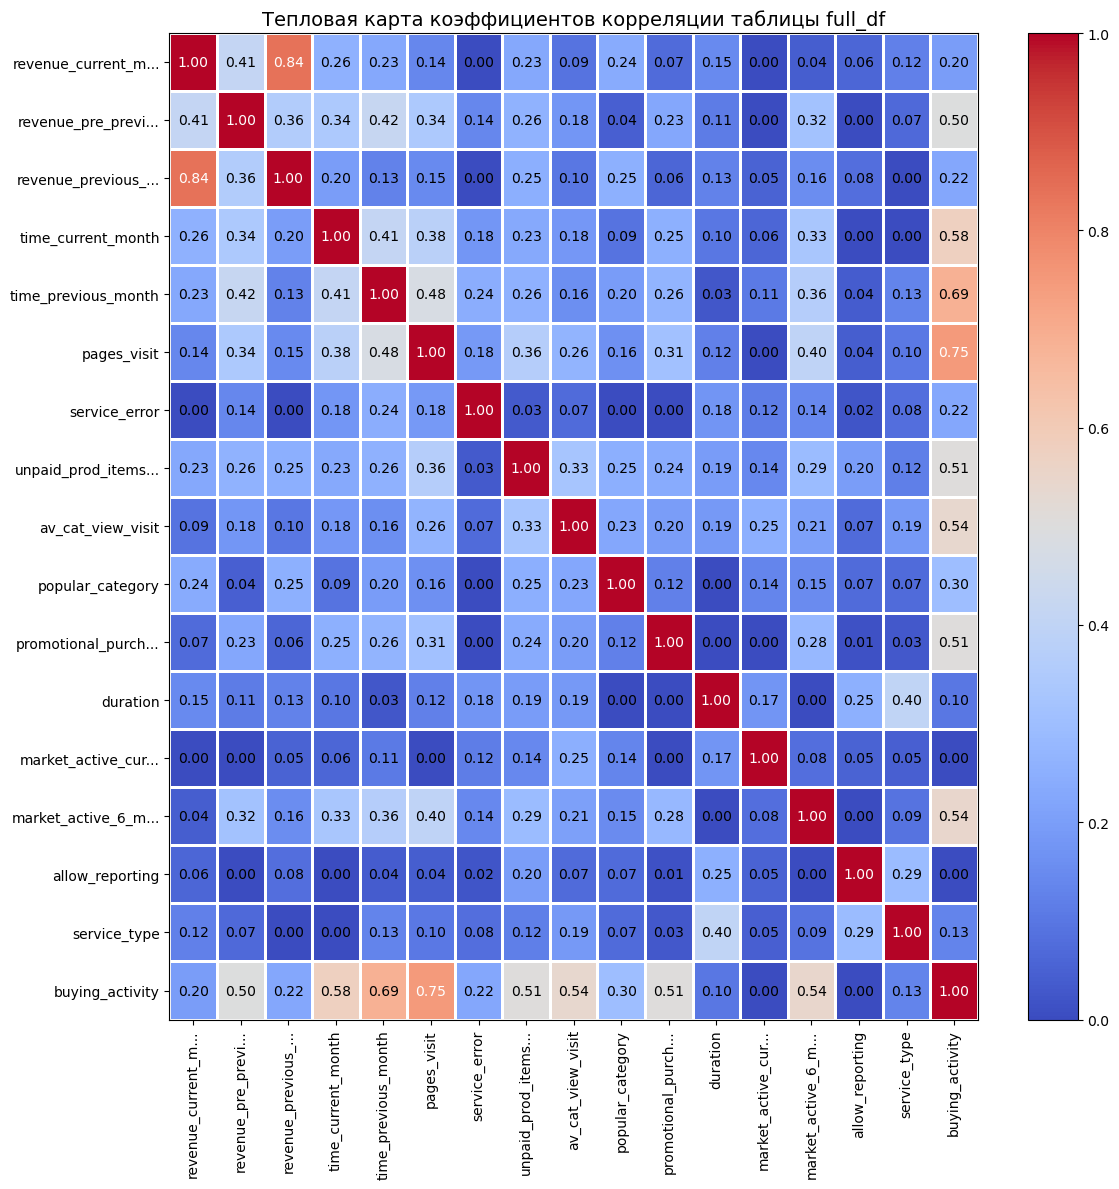

In [58]:
phik_overview = full_df[corr_columns_map].phik_matrix()
phik_overview.round(2)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="coolwarm", 
                        title="Тепловая карта коэффициентов корреляции таблицы full_df", 
                        fontsize_factor=1,
                        figsize=(12, 12))
plt.tight_layout()
plt.show()

Очевидно следующее:
1. Наибольшая корреляция покупательской активности с количеством посещенных страниц.
2. Вторая по величине корреляция у покупательской активности и временем, проведенным на сайте в прошлом месяце.
3. Выручка текущего месяца хорошо коррелирует с выручкой предыдущего месяца.

interval columns not set, guessing: ['market_active_6_months', 'market_active_curr_months', 'duration', 'promotional_purchases', 'av_cat_view_visit', 'unpaid_prod_items_quart', 'service_error', 'pages_visit', 'time_previous_month', 'time_current_month', 'revenue_previous_month', 'revenue_pre_previous_month', 'revenue_current_month']


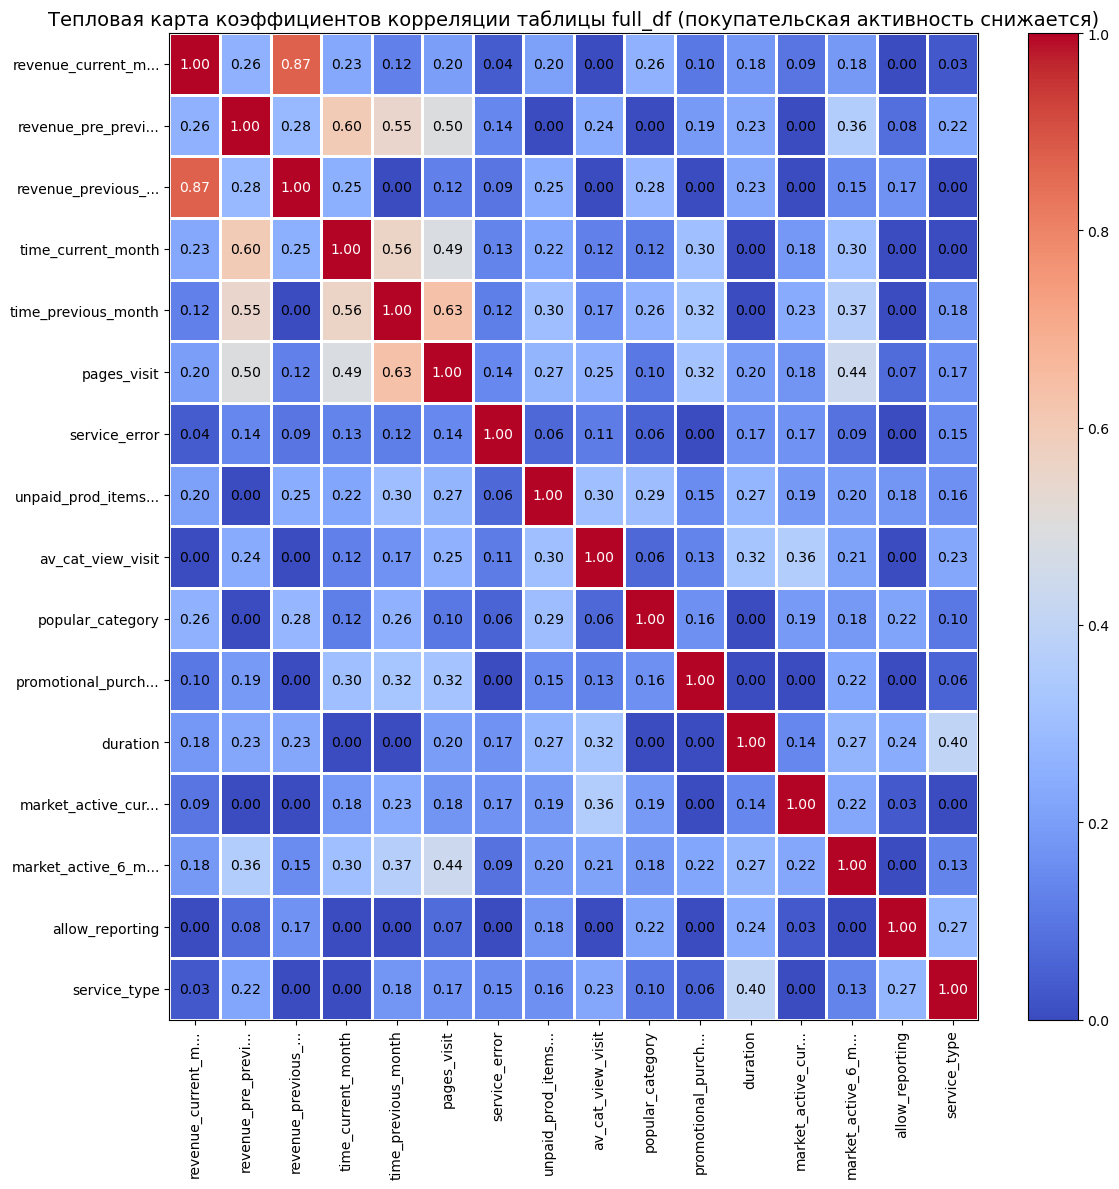

In [59]:
phik_overview = full_df.loc[full_df['buying_activity'] == 'Снизилась'][corr_columns_map].phik_matrix()
phik_overview.round(2)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="coolwarm", 
                        title="Тепловая карта коэффициентов корреляции таблицы full_df (покупательская активность снижается)", 
                        fontsize_factor=1,
                        figsize=(12, 12))
plt.tight_layout()
plt.show()

В отличие от полной карты, в карте  группы со сниженной покупательской следующие изменения:
1. Корреляция между выручкой текущего месяца и предыдущего стала чуть выше.
2. Появилась сравнительно высокая корреляция между выручкой предпредыдущего месяца и временем на сайте в текущем месяце.
3. Появилась сравнительно высокая корреляция между временем в предыдущем месяце и количеством просмотренных страниц.

interval columns not set, guessing: ['market_active_6_months', 'market_active_curr_months', 'duration', 'promotional_purchases', 'av_cat_view_visit', 'unpaid_prod_items_quart', 'service_error', 'pages_visit', 'time_previous_month', 'time_current_month', 'revenue_previous_month', 'revenue_pre_previous_month', 'revenue_current_month']


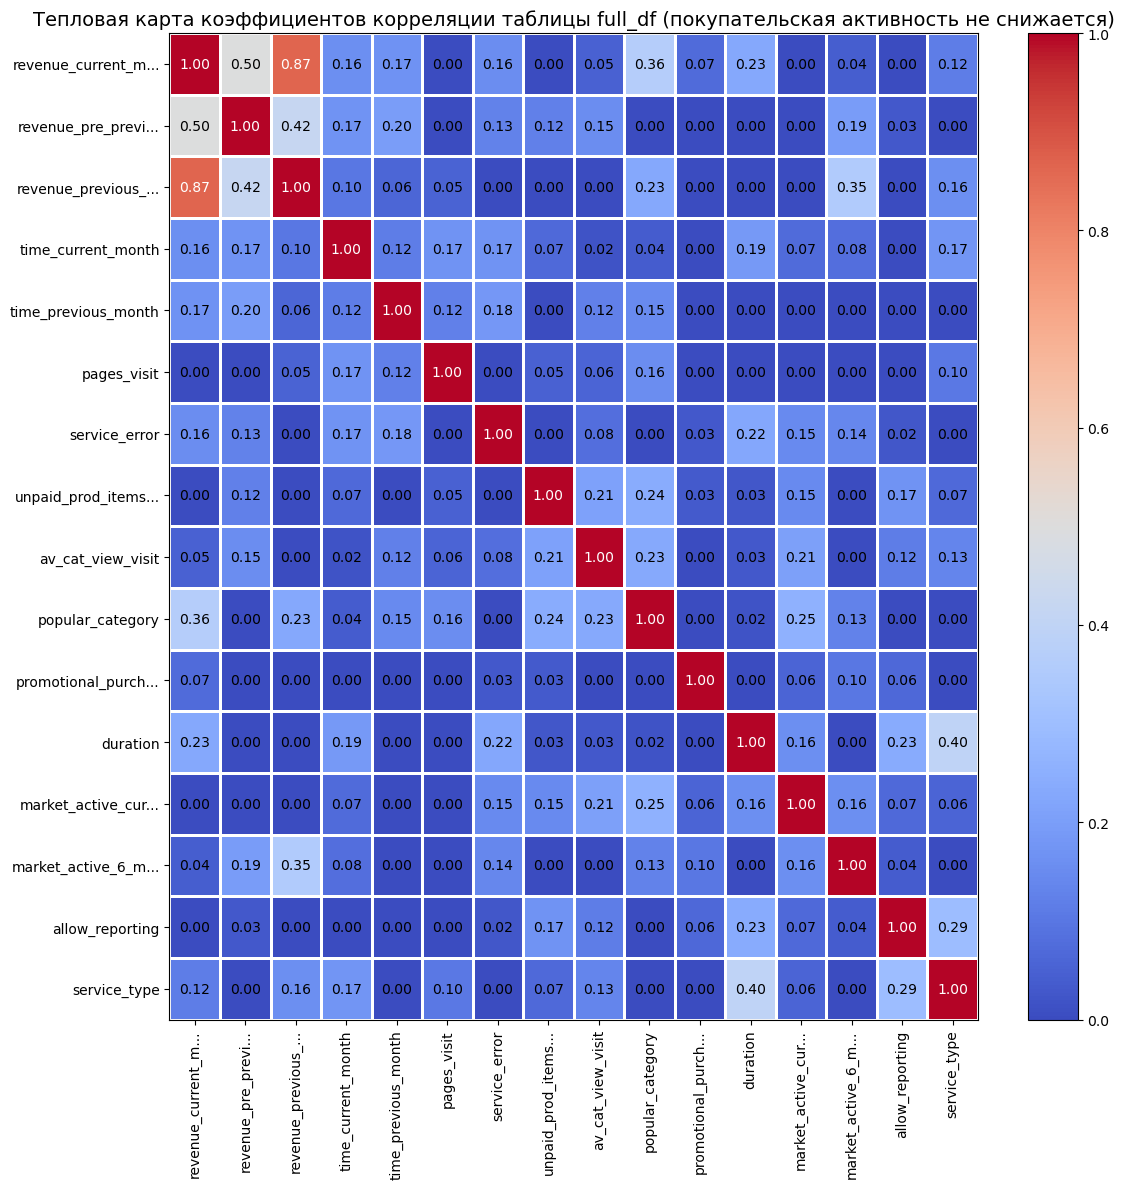

In [60]:
phik_overview = full_df.loc[full_df['buying_activity'] == 'Прежний уровень'][corr_columns_map].phik_matrix()
phik_overview.round(2)

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="coolwarm", 
                        title="Тепловая карта коэффициентов корреляции таблицы full_df (покупательская активность не снижается)", 
                        fontsize_factor=1,
                        figsize=(12, 12))
plt.tight_layout()
plt.show()

Основное отличие карты группы с прежнем уровнем покупательской активности от карты группы со сниженной покупательской активности в том, что меньше корреляця между временем на сайте, выручкой и количеством просмотренных страниц.

**Итог по разделу:**
1. Построена тепловая карта коррреляции признаков между собой.
2. Выручка текущего месяца сильно коррелирует с выручкой предыдущего месяца. Для устранение мультиколлинеарности выручка текущего месяца была возведена в квадрат.

## Использование пайплайнов

Сперва закодируем целевой признак.

In [61]:
full_df['cat_buying_activity'] = full_df.apply(cat_buying_activity, axis=1)

Проверим корректность кодирования целевого признака.

In [62]:
full_df.loc[full_df['buying_activity'] != 'Снизилась'].head()

,id,buying_activity,service_type,allow_reporting,market_active_6_months,market_active_curr_months,duration,promotional_purchases,popular_category,av_cat_view_visit,unpaid_prod_items_quart,service_error,pages_visit,time_previous_month,time_current_month,revenue_previous_month,revenue_pre_previous_month,revenue_current_month,cat_buying_activity
400,215748,Прежний уровень,стандарт,нет,4.3,4,534,0.18,Кухонная посуда,3,1,4,10,13,13,5083.0,4552.0,5673.2,0
401,215749,Прежний уровень,премиум,да,5.8,5,624,0.30,Техника для красоты и здоровья,4,3,6,14,14,17,5190.0,4928.0,5092.5,0
402,215750,Прежний уровень,стандарт,да,4.8,5,634,0.21,Товары для детей,4,5,3,10,13,14,3319.0,4730.0,4672.3,0
403,215751,Прежний уровень,стандарт,да,4.1,4,957,0.17,Техника для красоты и здоровья,5,2,6,9,14,12,5340.0,4769.0,5021.5,0
404,215752,Прежний уровень,стандарт,нет,4.0,4,475,0.30,Мелкая бытовая техника и электроника,3,3,7,7,13,8,5188.5,4635.0,5798.2,0


In [63]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 1 to 1299
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          1296 non-null   int64  
 1   buying_activity             1296 non-null   object 
 2   service_type                1296 non-null   object 
 3   allow_reporting             1296 non-null   object 
 4   market_active_6_months      1296 non-null   float64
 5   market_active_curr_months   1296 non-null   int64  
 6   duration                    1296 non-null   int64  
 7   promotional_purchases       1296 non-null   float64
 8   popular_category            1296 non-null   object 
 9   av_cat_view_visit           1296 non-null   int64  
 10  unpaid_prod_items_quart     1296 non-null   int64  
 11  service_error               1296 non-null   int64  
 12  pages_visit                 1296 non-null   int64  
 13  time_previous_month         1296 non-n

Всё сделано корректно. Приступаем к созданию пайплайна для выбора лучшей модели. В качестве моделей будем использовать модели на основе метода опорных векторов, метода k-ближайших соседей, дерева решений и логистрической регрессии. В качестве метрики будем использовать ROC-AUC, так как эта метрика позволяет оценить качество бинаркой классификации (в нашем случае эта она), при этом учитывает работу модели при всех возможных порогах классификации.

На основании полной тепловой карты корреляции выберем столбцы, у которых значительный уровень корреляции (выше 0,3).

In [64]:
#столбцы с корреляцией
corr_columns = ['revenue_pre_previous_month',
                'revenue_previous_month',
                'time_current_month',
                'time_previous_month',
                'pages_visit',
                'unpaid_prod_items_quart',
                'av_cat_view_visit',
                'promotional_purchases',
                'market_active_6_months'
               ]

In [65]:
%%time

RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(  
    full_df[corr_columns],
    full_df['cat_buying_activity'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = full_df['cat_buying_activity'])

X_train.shape, X_test.shape

# сформируем списки с названиями признаков
ord_columns = ['av_cat_view_visit']
num_columns = ['revenue_pre_previous_month',
               'revenue_previous_month',
                'time_current_month',
                'time_previous_month',
                'pages_visit',
                'unpaid_prod_items_quart',
                'promotional_purchases',
                'market_active_6_months'
              ]


# сформируем пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    [1, 2, 3, 4, 5, 6],               
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# сформируем общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# сформируем итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
 
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky' 'sag', 'saga'],
            penalty='l2'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC
    {
        'models':[svm.SVC(random_state=RANDOM_STATE, probability=True)],
        'models__kernel': ['linear' 
                           'poly' 
                           'rbf', 
                           'sigmoid'
                          ],
        'models__C': range(1, 5),
        'models__degree': range(2, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидационной выборке:', randomized_search.best_score_)


# проверим работу модели на тестовой выборке
# рассчитаем прогноз на тестовых данных
y_test_pred = randomized_search.predict(X_test)
preds = randomized_search.predict_proba(X_test)

print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, preds[:, 1])}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categories=[[1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                  

Лучшая модель это модель SVC с kernel sigmoid и масштабированием StandardScaler().

## Анализ важности признаков

Для анализа важности признаков построим графики важности с помощью методов SHAP. Спервы выделим из Pipeline модель и обучим тестовые данные.

In [66]:
model = randomized_search.best_estimator_.named_steps['models']

In [67]:
preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']

In [68]:
X_test_preprocessed = preprocessor.transform(X_test)

In [69]:
shap_sample_exp = shap.sample(X_test_preprocessed, 1)

In [70]:
explainer = shap.KernelExplainer(model.predict, shap_sample_exp)
shap_values = explainer(X_test_preprocessed)

  0%|          | 0/324 [00:00<?, ?it/s]

Так как у нас не использовался метод кодирования OneHotEncoder, названия признаков сформируем так, как это сделано в Pipeline.

In [71]:
all_feature_columns = ['av_cat_view_visit',
                       'revenue_previous_month',
               'revenue_pre_previous_month',
                'time_current_month',
                'time_previous_month',
                'pages_visit',
                'unpaid_prod_items_quart',
                'promotional_purchases',
                'market_active_6_months'
              ]

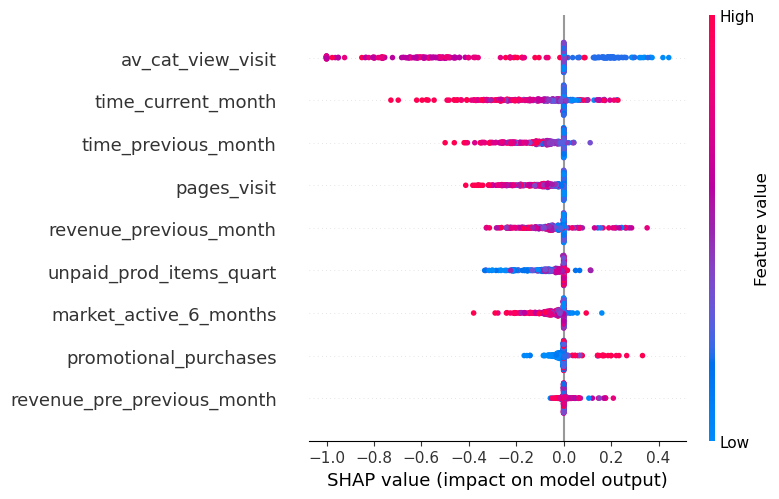

In [72]:
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=all_feature_columns)

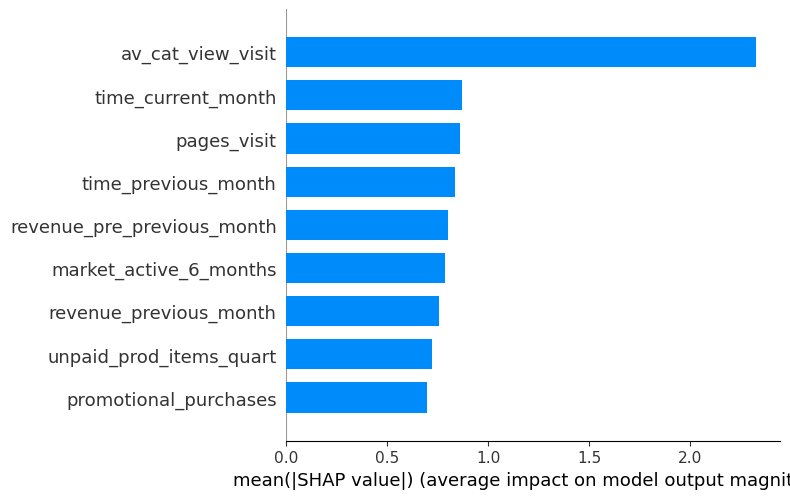

In [73]:
shap.summary_plot(shap_values.data, X_test_preprocessed, feature_names=all_feature_columns, plot_type="bar")

Как видно из диаграмм, наибольшее влияние оказывают признаки av_cat_view_visit, time_current_month и page_visit (среднее количество просмотренных категорий за квартал, количество времени, проведенное на сайте в текущем месяце и количество посещенных страниц). Наименьшее значение имеются признаки, связанные с покупками по акции и количеством неоплаченных товаров в корзине.  
Теоретически, влияя на признаки с большой значимостью, можно добиться улучшения покупательской активности пользователей.

**Итог по разделу:** определены наиболее значимые для модели признаки: это среднее количество просмотренных категорий за месяц, количество времени, проведенное на сайте в текущем месяце и количество посещенных страниц.

## Сегментация покупателей

### Создание общего датафрейма

Сперва объединим общий датафрейм и датафрейм с информацией о прибыли с каждого пользователя.

In [74]:
full_df = full_df.merge(money_df, on='id', how='left')

In [75]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          1296 non-null   int64  
 1   buying_activity             1296 non-null   object 
 2   service_type                1296 non-null   object 
 3   allow_reporting             1296 non-null   object 
 4   market_active_6_months      1296 non-null   float64
 5   market_active_curr_months   1296 non-null   int64  
 6   duration                    1296 non-null   int64  
 7   promotional_purchases       1296 non-null   float64
 8   popular_category            1296 non-null   object 
 9   av_cat_view_visit           1296 non-null   int64  
 10  unpaid_prod_items_quart     1296 non-null   int64  
 11  service_error               1296 non-null   int64  
 12  pages_visit                 1296 non-null   int64  
 13  time_previous_month         1296 

Объединение проведено успешно.

### Выделение сегментов покупателей

Теперь выделим два сегмента покупателей:
1. Покупатели, которые приносят наибольшую прибыль и активность которых снижается. Примем этот сегмент как целевой.
2. Покупатели, которые приносят наибольшую прибыль и активность которых остается на прежнем уровне. Примем этот сегмент как сравнительный.

Перед выделением сегментов получим прогноз модели по каждому пользователю и добавим вероятности в общую таблицу.

In [76]:
full_df_preprocessed = preprocessor.transform(full_df[corr_columns])

In [77]:
chance_activity = model.predict_proba(full_df_preprocessed)

Сформируем датафрейм:

In [78]:
chance_activity = pd.DataFrame(chance_activity)

In [79]:
activity_columns = {
    0: 'chance_previous_level',
    1: 'chance_low_level'
}

In [80]:
chance_activity = chance_activity.rename(columns=activity_columns)

Объединим датафреймы:

In [81]:
full_df = full_df.join(chance_activity, how='left')

Проверим как объединились:

In [82]:
full_df.head()

,id,buying_activity,service_type,allow_reporting,market_active_6_months,market_active_curr_months,duration,promotional_purchases,popular_category,av_cat_view_visit,...,pages_visit,time_previous_month,time_current_month,revenue_previous_month,revenue_pre_previous_month,revenue_current_month,cat_buying_activity,profit,chance_previous_level,chance_low_level
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,...,5,12,10,5216.0,4472.0,4971.6,1,4.16,0.653219,0.346781
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,...,5,8,13,5457.5,4826.0,5058.4,1,3.13,0.643901,0.356099
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,...,4,11,13,6158.0,4793.0,6610.4,1,4.87,0.677786,0.322214
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,...,2,8,11,5807.5,4594.0,5872.5,1,4.21,0.293560,0.706440
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,...,4,10,10,4738.5,5124.0,5388.5,1,3.95,0.721133,0.278867


Теперь приступаем к формированию сегментов на основе работы модели. Для этого надо понять, какой порог считать критическим. 
Ошибка первого рода (ложноположительный результат): активность пользователя будет помечена как "снижается", хотя она на прежнем уровне.
Ошибка второго рода (ложноотрицательный результат): активность пользователя будет помечена как "прежний уровень", хотя она снижается.
В данном случае опаснее упустить тех, чья активность снижается, соответственно ориентируемся по ошибке второго рода или метрике Recall.

Рассчитаем порог по указанной метрике.

In [83]:
y_proba = model.predict_proba(X_test_preprocessed)[:,1]

data_predict = pd.DataFrame(zip(y_test, y_proba), columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

thresholds = [round(i,2) for i in np.linspace(0.2,0.4,num = 10,endpoint=False)]

for i in thresholds:
    data_predict['y_pred_'+str(i)] = data_predict['y_proba'].apply(lambda x: 1 if x >= i else 0)
    recall = recall_score(data_predict['y_valid'], data_predict['y_pred_'+str(i)])
    precision = precision_score(data_predict['y_valid'], data_predict['y_pred_'+str(i)])
    print(f'Recall для {i} равен', round(recall, 2))
    print(f'Precision для {i} равен', round(precision, 2))
    print()

# выведем 5 случайных строк
print(data_predict.sample(5))

Recall для 0.2 равен 0.85
Precision для 0.2 равен 0.52

Recall для 0.22 равен 0.83
Precision для 0.22 равен 0.54

Recall для 0.24 равен 0.8
Precision для 0.24 равен 0.57

Recall для 0.26 равен 0.79
Precision для 0.26 равен 0.57

Recall для 0.28 равен 0.77
Precision для 0.28 равен 0.59

Recall для 0.3 равен 0.77
Precision для 0.3 равен 0.61

Recall для 0.32 равен 0.76
Precision для 0.32 равен 0.62

Recall для 0.34 равен 0.75
Precision для 0.34 равен 0.65

Recall для 0.36 равен 0.73
Precision для 0.36 равен 0.66

Recall для 0.38 равен 0.72
Precision для 0.38 равен 0.67

     y_valid   y_proba  y_pred_0.2  y_pred_0.22  y_pred_0.24  y_pred_0.26  \
11         0  0.071209           0            0            0            0   
224        1  0.789900           1            1            1            1   
316        1  0.230661           1            1            0            0   
290        0  0.239320           1            1            0            0   
151        1  0.684683           1      

Проверим сколько людей в обоих сегментах при пороге в 0,28.

In [84]:
print(f'Сегмент с высокой прибылью и с порогом вероятности снижения более 0,28: {full_df.loc[(full_df["chance_low_level"] >= 0.28) & (full_df["profit"] >= 4.67)]["id"].count()}')

Сегмент с высокой прибылью и с порогом вероятности снижения более 0,28: 142


In [85]:
print(f'Сегмент с высокой прибылью и с порогом вероятности снижения менее 0,28: {full_df.loc[(full_df["chance_low_level"] <= 0.28) & (full_df["profit"] >= 4.67)]["id"].count()}')

Сегмент с высокой прибылью и с порогом вероятности снижения менее 0,28: 187


Примем порог в 0,28 по следующим причинам:
1. Recall достаточно высок.
2. Precision не слишком низкий.
3. Количество людей в обоих сегментах примерно одинаковое.

Сформируем сегменты:

In [86]:
segment_high_profit = full_df.loc[(full_df['profit'] >= 4.67)]

In [87]:
def cat_activity_model(df):  # функция кодирования целевого признака по результатам модели.
    if df['chance_low_level'] >= 0.28:
        return 'Снизится'
    else:
        return 'Прежний уровень'

In [88]:
segment_high_profit['cat_activity_model'] = segment_high_profit.apply(cat_activity_model, axis=1)

In [89]:
segment_low_activ = full_df.loc[(full_df['chance_low_level'] >= 0.28) & (full_df['profit'] >= 4.67)]  # сегмент пользователей, чья активность вероятно снизится.
segment_not_low_activ = full_df.loc[(full_df['chance_low_level'] <= 0.28) & (full_df['profit'] >= 4.67)]  # сегмент пользователей, чья активность скорее всего не снизится.

Сохраним вероятности снижения покупательской активности в отдельный столбец.

Оценим созданные датафреймы сегментов.

In [90]:
segment_low_activ['id'].count()

142

In [91]:
segment_not_low_activ['id'].count()

187

Выборки близки, но неодинаковые по размеру. Это следует учитывать при дальнейшем анализе.

### Анализ сегментов покупателей

#### Время, проведенное на сайте

Посмотрим, как соотносится в целевой выборке время, проведенное на сайте в текущем месяце и в предыдущем.

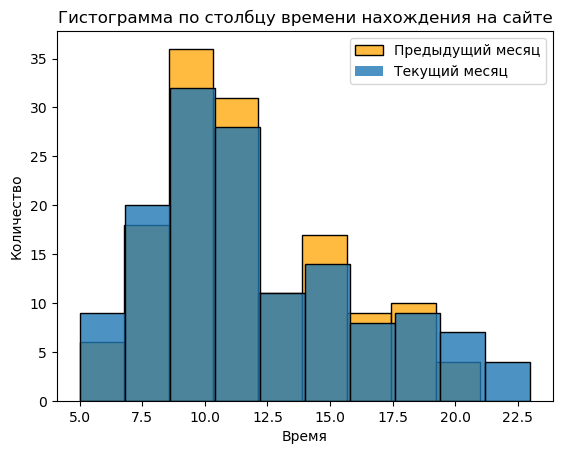

In [92]:
ax = sns.histplot(data=segment_high_profit.loc[(segment_high_profit['cat_activity_model'] == 'Снизится')], x='time_previous_month', color = 'orange')
ax = sns.histplot(data=segment_high_profit.loc[(segment_high_profit['cat_activity_model'] == 'Снизится')], x='time_current_month', alpha = 0.8)
ax.set(xlabel='Время', ylabel='Количество', title=f'Гистограмма по столбцу времени нахождения на сайте')
plt.legend(['Предыдущий месяц', 'Текущий месяц'])
plt.show()

В целевом сегменте в общем случае снижается время нахождения на сайте.

#### Просмотренные категории

Теперь посмотрим как соотносится количество просмотренных категорий у целевого сегмента и сравнительного.

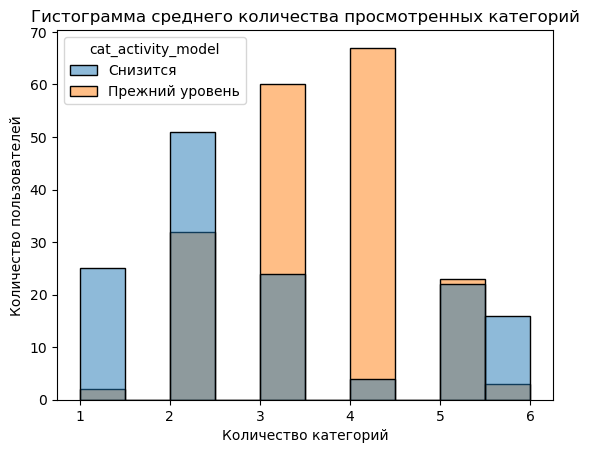

In [93]:
ax = sns.histplot(data=segment_high_profit, x='av_cat_view_visit', hue='cat_activity_model')
ax.set(xlabel='Количество категорий', ylabel='Количество пользователей', title='Гистограмма среднего количества просмотренных категорий')
plt.show()

Как видно, пользователи, чья покупательская способность снизилась, смотрят меньше категорий, чем те, у кого она на прежнем уровне.

#### Популярные категории

Посмотрим, какие наиболее популярные категории товаров в эттих двух сегментах покупателей.

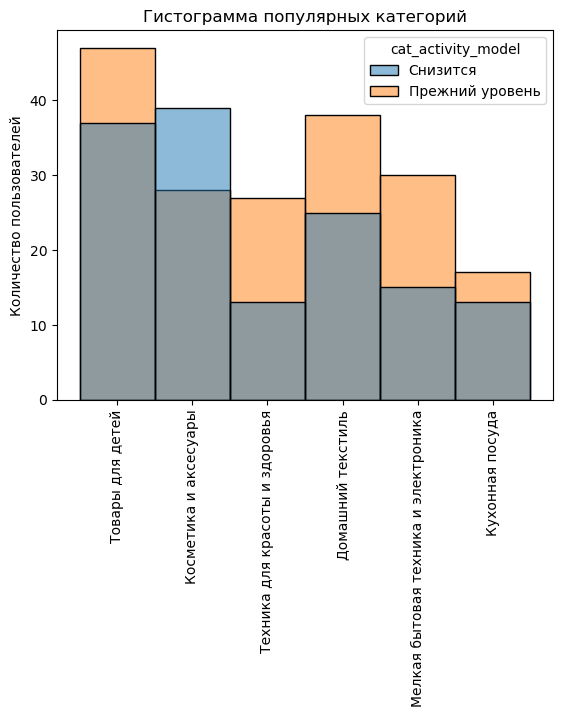

In [94]:
ax = sns.histplot(data=segment_high_profit, x='popular_category', hue='cat_activity_model')
ax.set(xlabel='', ylabel='Количество пользователей', title='Гистограмма популярных категорий')
plt.xticks(rotation=90)
plt.show()

Самая популярная категория - Товары для детей. Это справедливо и для людей с низким уровнем активности и с прежним.

#### Количество посещенных страниц

Посмотрим, сколько страниц посещают людей из обоих сегментов.

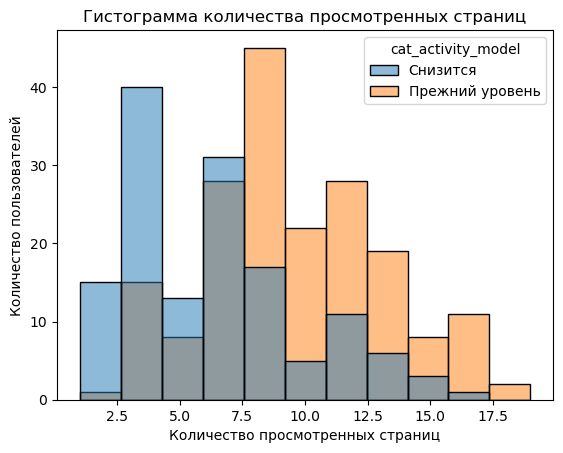

In [95]:
ax = sns.histplot(data=segment_high_profit, x='pages_visit', hue='cat_activity_model')
ax.set(xlabel='Количество просмотренных страниц', ylabel='Количество пользователей', title='Гистограмма количества просмотренных страниц')
plt.show()

Пользователи со сниженной покупательской активностью посещают меньше страниц.

#### Количество неоплаченных товаров

Посмотрим, сколько имеют неоплаченных товаров в корзине люди из обоих сегментов.

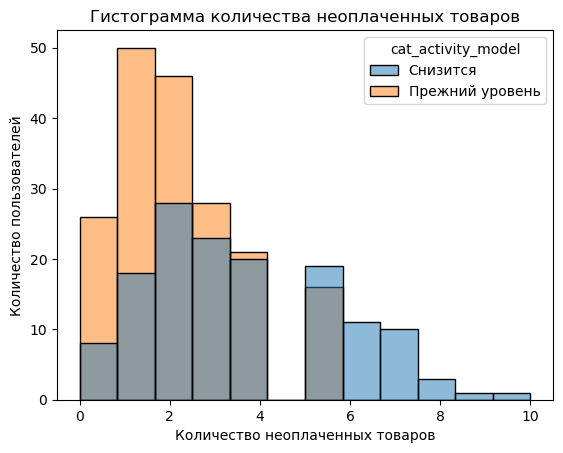

In [96]:
ax = sns.histplot(data=segment_high_profit, x='unpaid_prod_items_quart', hue='cat_activity_model')
ax.set(xlabel='Количество неоплаченных товаров', ylabel='Количество пользователей', title='Гистограмма количества неоплаченных товаров')
plt.show()

У людей, у которых снизилась покупательская активность, больше неоплаченных товаров в корзине чем у тех, у кого активность не снизилась.

#### Уведомления об акциях

Посмотрим, чаще ли люди с прежним уровнем покупательской активности соглашаются на маркетинговые уведомления.

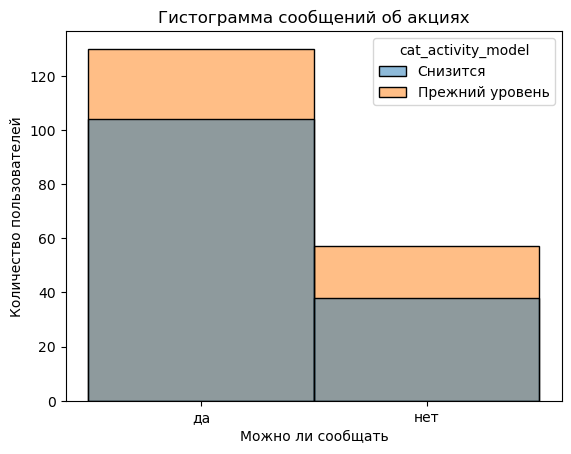

In [97]:
ax = sns.histplot(data=segment_high_profit, x='allow_reporting', hue='cat_activity_model')
ax.set(xlabel='Можно ли сообщать', ylabel='Количество пользователей', title='Гистограмма сообщений об акциях')
plt.show()

Соотношение примерно одинаковое.

#### Количество маркетинговых коммуникаций за 6 месяцев

Посмотрим, есть ли разница в количестве маркетинговых коммуникаций за 6 месяцев у пользователей из обоих сегментов. 

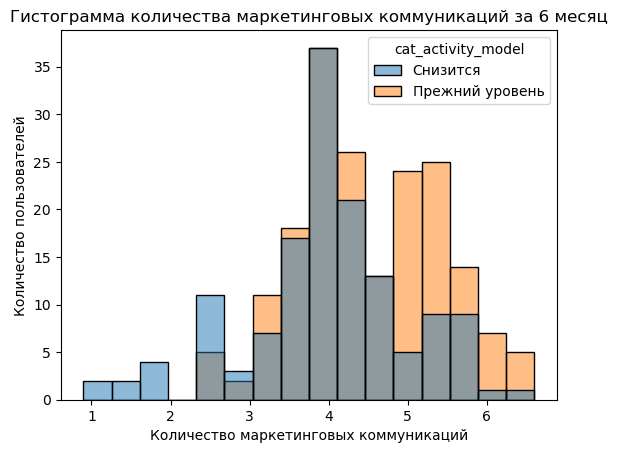

In [98]:
ax = sns.histplot(data=segment_high_profit, x='market_active_6_months', hue='cat_activity_model')
ax.set(xlabel='Количество маркетинговых коммуникаций', ylabel='Количество пользователей', title='Гистограмма количества маркетинговых коммуникаций за 6 месяц')
plt.show()

В среднем на людей, чья активность снизилась, приходилось меньше маркетинговых коммуникаций за последние 6 месяцев.

#### Количество маркетинговых коммуникаций за текущий месяц

Оценим этот же показатель за текущий месяц.

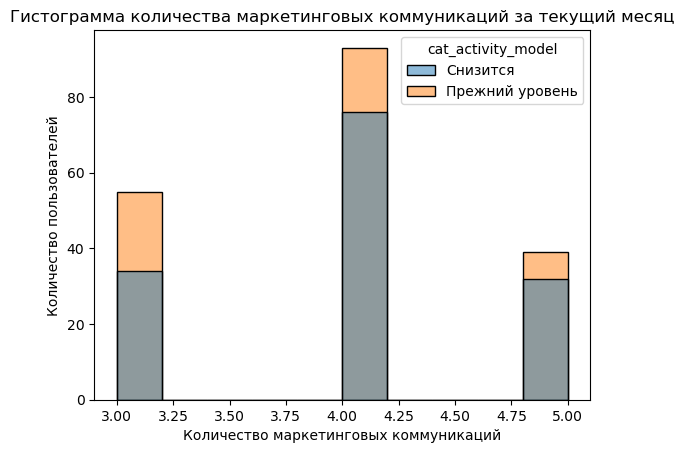

In [99]:
ax = sns.histplot(data=segment_high_profit, x='market_active_curr_months', hue='cat_activity_model')
ax.set(xlabel='Количество маркетинговых коммуникаций', ylabel='Количество пользователей', title='Гистограмма количества маркетинговых коммуникаций за текущий месяц')
plt.show()

За текущий период количество коммуникаций примерно одинаковое.

#### Длительность присутствия на сайте

Оценим, как долго пользователи из обоих сегментов зарегистрированы на сайте.

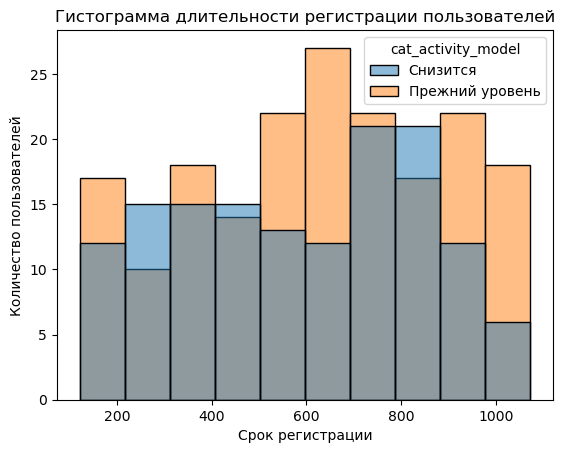

In [100]:
ax = sns.histplot(data=segment_high_profit, x='duration', hue='cat_activity_model')
ax.set(xlabel='Срок регистрации', ylabel='Количество пользователей', title='Гистограмма длительности регистрации пользователей')
plt.show()

Соотношение примерно одинаковое.

#### Количество покупок по акциям

Оценим, как часто пользователи из обоих сегментов пользуются акциями.

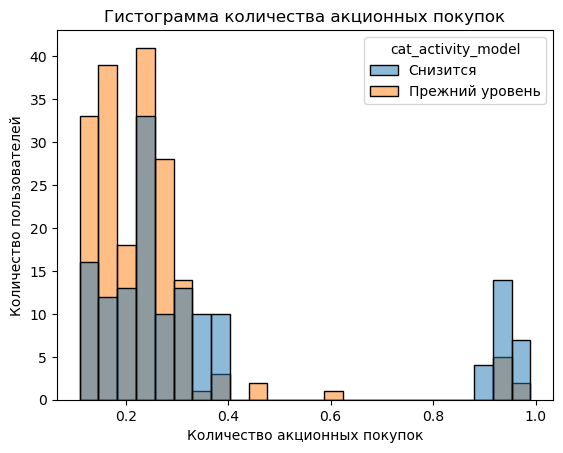

In [101]:
ax = sns.histplot(data=segment_high_profit, x='promotional_purchases', hue='cat_activity_model')
ax.set(xlabel='Количество акционных покупок', ylabel='Количество пользователей', title='Гистограмма количества акционных покупок')
plt.show()

Люди, у которых снизилась покупательская активность, больше акционных покупок, чем у людей, у которых активность не снизилась.

#### Количество ошибок сервиса

Оцением, как часто пользователи из обоих сегментов сталкиваются с ошибками сервиса.

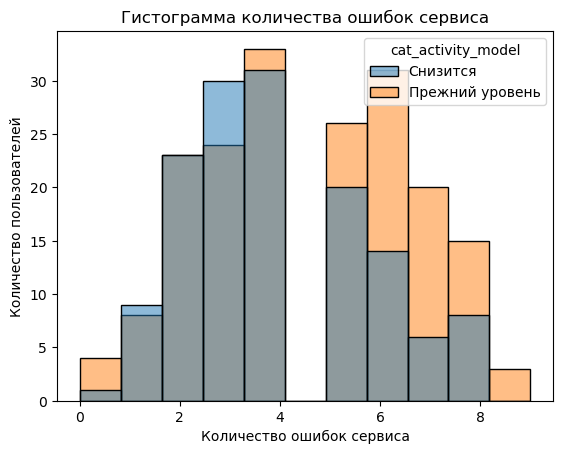

In [102]:
ax = sns.histplot(data=segment_high_profit, x='service_error', hue='cat_activity_model')
ax.set(xlabel='Количество ошибок сервиса', ylabel='Количество пользователей', title='Гистограмма количества ошибок сервиса')
plt.show()

Количество ошибок примерно одинаковое.

#### Итог по разделу  
Покупателей с высоким уровнем прибыли и со сниженной покупательской активностью отличают следующие факторы:
1. Сравнительно невысокий уровень маркетинговых коммуникаций за последние 6 месяцев.
2. Сравнительно большое количество неоплаченных товаров в корзине.
3. Небольшое количество посещенных страниц.
4. Небольшое количество посмотренных категорий.
5. Небольшое количество времени, проведенного на сайте.
6. Самая популярная категория: товары для детей.  

Необходимо учесть, что не все факторы являются причиной. Они указывают лишь на различия в сегментах.

Рекомендации по улучшению покупательской активности:
1. Увеличить уровень маркетинговых коммуникаций. Возможно, это также увеличит время, проведенное на сайте, количество просмотренных страниц и количество просмотренных категорий. Для покупаталей, чья активность не снизилась, эти показатели выше.
2. Продумать стратегию к побуждению покупки товаров из корзины, к примеру, акции и скидки. Как показал анализ, эта группа покупаталей достаточно охотно откликается на акции.

Для дополнительного исследования взят сегмент покупаталей с высокой прибылью, но чья покупательская способность не снизилась. Данный сегмент рассмотрен для сравнению с первым сегментом.

## Выводы

**В рамках работы выполнено:**
1. Загружены и обработаны предоставленные данные. 
2. Проведен исследовательский анализ данных на наличие аномальный и выпадающих значений.
3. Проведен корреляционный анализ данных.
4. Составлены и обучены ряд моделей для прогнозирования покупательской активности. Среди моделей выбрана модель с наиболее точными результатами. Использованные в работе модели: метод опорных векторов, миетод k-ближайших соседей, дерево решений и логистическай регрессия.  
5. Проанализированы признаки, на которых обучалась модель и установлены те, которые имеют наибольший вклад в конечный результат.
6. На основании результатов моделирования были выделены сегменты покупателей и выданы рекомендации по увеличению покупательской активности. В рамках работы был подробно рассмотрены покупатели, приносящие наибольшую прибыль, но покупательская активность которых снижается.
 
 
**Основные результаты работы:**
1. В представленных данных не было пропусков, но были значения, значительно отклоняющиеся от средних.
2. При корреляционном анализе было выявленно, что выручка предыдущего месяца сильно коррелирует с выручкой текущего месяца (линейная зависимость). В связи с этим при моделировании зависимость была устранена путем возведения значений выручки текущего месяца в квадрат.
3. Среди разработанных и испытанных моделей наилучший результат показала модель на основе метода опорных векторов с методом масштабирования StandartScale. Модель позволяет предсказывать снижение или сохранение покупательской активности конкретного пользователя на основе ряда признаков.
4. Анализ результата работы модели выявил, что наибольшее влияние при прогнозировании оказывает время, проведенное на сайте, в текущем и предыдущем месяце, а также среднее количество просмотренных категорий товаров за квартал.
5. Касательно рассмотренного сегмента пользователей. Пользователи из этой категории в среднем получали меньше маркетинговой информации, меньше проводили время на сайте и просматривали меньше страниц. При этом имеют сравнительно высокое количество неоплаченных товаров в корзине. Наиболее популярная категория - товары для детей.


**Рекомендации для увеличения покупательской активности выделенного сегмента пользователей:**
1. Увеличить количество маркетинговых коммуникаций. Предположительно, это также приведет к увеличению времени нахождения на сайте и к увеличению количества просмотренных страниц.
2. Рассмотреть возможность проведения акций для товаров, находящихся в корзине у пользователей рассматриваемого сегмента. Данные анализа показывают, что пользователи из этого сегмента охотно откликаются на акции.

**Рекомендации для повышения качества анализа и прогнозирования:**  
Представить данные за другие периоды для опробирования модели на новых данных. 